In [1]:
import pandas as pd
loan_result = pd.read_csv("loan_result.csv")
log_data = pd.read_csv("log_data.csv")
user_spec = pd.read_csv("user_spec.csv",encoding='CP949')

In [2]:
sorted_spec = user_spec.sort_values(by='user_id')
sorted_log = log_data.sort_values(by='user_id')

In [28]:
get_some_event = sorted_log[(sorted_log['event'] == 'EndLoanApply')|(sorted_log['event'] == 'UseLoanManage')]
get_some_event

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
2451691,1,UseLoanManage,2022-06-16 23:58:41,Android,3.12.1,2022-06-16
3550224,11,EndLoanApply,2022-06-13 21:45:22,iOS,NaN,2022-06-13
9505113,11,UseLoanManage,2022-03-24 11:05:31,iOS,3.6.1,2022-03-24
9505112,11,UseLoanManage,2022-03-24 11:05:31,iOS,3.6.1,2022-03-24
9505111,11,EndLoanApply,2022-03-24 10:59:46,iOS,3.6.1,2022-03-24
...,...,...,...,...,...,...
14380172,879694,EndLoanApply,2022-03-31 20:18:18,iOS,3.6.1,2022-03-31
6068519,879695,EndLoanApply,2022-05-27 12:51:23,iOS,NaN,2022-05-27
7298667,879696,UseLoanManage,2022-03-14 05:37:09,Android,3.8.2,2022-03-14
7298672,879696,EndLoanApply,2022-03-14 05:42:14,Android,3.8.2,2022-03-14


In [20]:
picked_log = get_some_event.loc[:,['user_id','event']]

In [21]:
arr = picked_log.to_numpy()

In [22]:
id_UseLoanManage = set()
for i in range(len(picked_log)):
    if arr[i][0] not in id_UseLoanManage and arr[i][1] == 'UseLoanManage':
        id_UseLoanManage.add(arr[i][0])

In [24]:
print(len(id_UseLoanManage))

297468


In [25]:
id_EndLoanApply = set()
for i in range(len(picked_log)):
    if arr[i][0] not in id_UseLoanManage and arr[i][0] not in id_EndLoanApply and arr[i][1] == 'EndLoanApply':
        id_EndLoanApply.add(arr[i][0])

In [26]:
print(len(id_EndLoanApply))

87243


In [33]:
log_df = picked_log[(picked_log['user_id'].isin(id_UseLoanManage))&(picked_log['event'] == 'UseLoanManage')|(picked_log['user_id'].isin(id_EndLoanApply))&(picked_log['event'] == 'EndLoanApply')]

In [35]:
drop_log_df = log_df.drop_duplicates()

In [36]:
drop_log_df

,user_id,event
2451691,1,UseLoanManage
9505113,11,UseLoanManage
5722540,12,UseLoanManage
7223836,17,UseLoanManage
2695135,19,EndLoanApply
...,...,...
16594389,879692,UseLoanManage
3408199,879693,UseLoanManage
14380174,879694,EndLoanApply
6068519,879695,EndLoanApply


In [37]:
merge_spec_log_df = pd.merge(left=sorted_spec, right=drop_log_df, how="inner", on="user_id")

In [38]:
merge_spec_log_df

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,event
0,1767402,1,2000.0,1.0,2022-05-03 14:53:33,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,0.0,NaN,1.0,NaN,UseLoanManage
1,1031304,1,2000.0,1.0,2022-05-03 14:51:00,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,0.0,생활비,0.0,NaN,1.0,NaN,UseLoanManage
2,1521731,11,1997.0,1.0,2022-06-09 11:25:25,670.0,28000000.0,EARNEDINCOME,20210601.0,정규직,기타가족소유,13000000.0,대환대출,0.0,0.0,1.0,14000000.0,UseLoanManage
3,1894024,11,1997.0,1.0,2022-06-13 21:44:30,670.0,28000000.0,EARNEDINCOME,20210601.0,정규직,기타가족소유,50000000.0,주택구입,0.0,0.0,1.0,14000000.0,UseLoanManage
4,1180616,11,1997.0,1.0,2022-03-24 10:58:22,640.0,25000000.0,EARNEDINCOME,202106.0,정규직,기타가족소유,2000000.0,생활비,NaN,NaN,1.0,14000000.0,UseLoanManage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287133,1186879,879693,2001.0,0.0,2022-05-17 14:20:52,710.0,24000000.0,EARNEDINCOME,202110.0,정규직,전월세,5000000.0,생활비,0.0,0.0,3.0,16000000.0,UseLoanManage
1287134,1889786,879694,1991.0,0.0,2022-03-31 20:17:31,NaN,39000000.0,EARNEDINCOME,201909.0,정규직,전월세,10000000.0,생활비,NaN,NaN,NaN,NaN,EndLoanApply
1287135,1774704,879695,1996.0,1.0,2022-05-27 12:50:55,NaN,30000000.0,EARNEDINCOME2,202202.0,정규직,전월세,15000000.0,대환대출,0.0,0.0,NaN,NaN,EndLoanApply
1287136,1856758,879696,1997.0,1.0,2022-03-14 05:40:38,610.0,37000000.0,EARNEDINCOME,202110.0,정규직,전월세,10000000.0,생활비,NaN,NaN,3.0,20000000.0,UseLoanManage


In [56]:
one_hot_encoding_merge = pd.get_dummies(data = merge_spec_log_df, columns = ['event'], prefix = 'event')
one_hot_encoding_merge

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,event_EndLoanApply,event_UseLoanManage
0,1767402,1,2000.0,1.0,2022-05-03 14:53:33,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,0.0,NaN,1.0,NaN,0,1
1,1031304,1,2000.0,1.0,2022-05-03 14:51:00,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,0.0,생활비,0.0,NaN,1.0,NaN,0,1
2,1521731,11,1997.0,1.0,2022-06-09 11:25:25,670.0,28000000.0,EARNEDINCOME,20210601.0,정규직,기타가족소유,13000000.0,대환대출,0.0,0.0,1.0,14000000.0,0,1
3,1894024,11,1997.0,1.0,2022-06-13 21:44:30,670.0,28000000.0,EARNEDINCOME,20210601.0,정규직,기타가족소유,50000000.0,주택구입,0.0,0.0,1.0,14000000.0,0,1
4,1180616,11,1997.0,1.0,2022-03-24 10:58:22,640.0,25000000.0,EARNEDINCOME,202106.0,정규직,기타가족소유,2000000.0,생활비,NaN,NaN,1.0,14000000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287133,1186879,879693,2001.0,0.0,2022-05-17 14:20:52,710.0,24000000.0,EARNEDINCOME,202110.0,정규직,전월세,5000000.0,생활비,0.0,0.0,3.0,16000000.0,0,1
1287134,1889786,879694,1991.0,0.0,2022-03-31 20:17:31,NaN,39000000.0,EARNEDINCOME,201909.0,정규직,전월세,10000000.0,생활비,NaN,NaN,NaN,NaN,1,0
1287135,1774704,879695,1996.0,1.0,2022-05-27 12:50:55,NaN,30000000.0,EARNEDINCOME2,202202.0,정규직,전월세,15000000.0,대환대출,0.0,0.0,NaN,NaN,1,0
1287136,1856758,879696,1997.0,1.0,2022-03-14 05:40:38,610.0,37000000.0,EARNEDINCOME,202110.0,정규직,전월세,10000000.0,생활비,NaN,NaN,3.0,20000000.0,0,1


In [58]:
nan_merge = one_hot_encoding_merge.dropna(subset = ['credit_score','yearly_income','desired_amount','existing_loan_amt'],axis = 0)

In [59]:
picked_merge = nan_merge[['credit_score','yearly_income','desired_amount','existing_loan_amt']]
picked_merge

,credit_score,yearly_income,desired_amount,existing_loan_amt
2,670.0,28000000.0,13000000.0,14000000.0
3,670.0,28000000.0,50000000.0,14000000.0
4,640.0,25000000.0,2000000.0,14000000.0
5,670.0,25000000.0,13000000.0,14000000.0
6,490.0,32000000.0,1000000.0,21000000.0
...,...,...,...,...
1287131,710.0,24000000.0,2000000.0,16000000.0
1287132,610.0,24000000.0,4000000.0,16000000.0
1287133,710.0,24000000.0,5000000.0,16000000.0
1287136,610.0,37000000.0,10000000.0,20000000.0


In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
picked_merge_scaled = sc.fit_transform(picked_merge)
pd.DataFrame(picked_merge_scaled) #mean~min, mem_period 5개 변수가 표준화됨.

,0,1,2,3
0,0.325472,-0.158777,-0.084946,-0.629854
1,0.325472,-0.158777,0.129758,-0.629854
2,0.056310,-0.190740,-0.148776,-0.629854
3,0.325472,-0.190740,-0.084946,-0.629854
4,-1.289501,-0.116159,-0.154579,-0.552051
...,...,...,...,...
1013213,0.684355,-0.201394,-0.148776,-0.607625
1013214,-0.212852,-0.201394,-0.137171,-0.607625
1013215,0.684355,-0.201394,-0.131368,-0.607625
1013216,-0.212852,-0.062887,-0.102354,-0.563166


In [61]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(picked_merge_scaled)

picked_merge['cluster'] = clusters.labels_
picked_merge['cluster'].unique()

C:\Users\guddn\AppData\Local\Temp\ipykernel_22488\2134809048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picked_merge['cluster'] = clusters.labels_


array([0, 1, 2])

In [62]:
picked_merge.groupby('cluster').count()

,credit_score,yearly_income,desired_amount,existing_loan_amt
cluster,,,,
0,805820,805820,805820,805820
1,206897,206897,206897,206897
2,501,501,501,501


In [71]:
picked_merge.groupby('cluster').mean()

,credit_score,yearly_income,desired_amount,existing_loan_amt
cluster,,,,
0,598.486027,3.667044e+07,1.837594e+07,4.774666e+07
1,770.905426,6.579711e+07,4.748092e+07,1.599196e+08
2,659.481038,6.118423e+08,6.731972e+09,8.153693e+07


In [63]:
from sklearn.decomposition import PCA
X = picked_merge_scaled.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-0.3079365 , -0.03848924],
       [-0.21102624,  0.08248891],
       [-0.48287788,  0.0583564 ],
       ...,
       [-0.16571727, -0.29007893],
       [-0.48936083,  0.26313508],
       [-0.48936083,  0.26313508]])

In [64]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = picked_merge['cluster'] 
pca_df.head()

,0,1,cluster
0,-0.307937,-0.038489,NaN
1,-0.211026,0.082489,NaN
2,-0.482878,0.058356,0.0
3,-0.324375,-0.053171,0.0
4,-1.053015,0.794613,0.0


C:\Users\guddn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


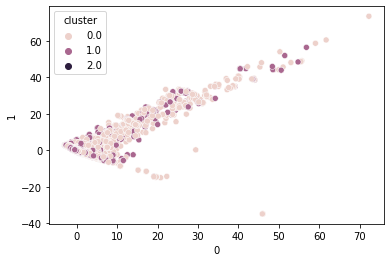

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)

In [67]:
merge_join = pd.concat([nan_merge, picked_merge],axis=1)
merge_join.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,event_EndLoanApply,event_UseLoanManage,credit_score,yearly_income,desired_amount,existing_loan_amt,cluster
2,1521731,11,1997.0,1.0,2022-06-09 11:25:25,670.0,28000000.0,EARNEDINCOME,20210601.0,정규직,...,0.0,1.0,14000000.0,0,1,670.0,28000000.0,13000000.0,14000000.0,0
3,1894024,11,1997.0,1.0,2022-06-13 21:44:30,670.0,28000000.0,EARNEDINCOME,20210601.0,정규직,...,0.0,1.0,14000000.0,0,1,670.0,28000000.0,50000000.0,14000000.0,0
4,1180616,11,1997.0,1.0,2022-03-24 10:58:22,640.0,25000000.0,EARNEDINCOME,202106.0,정규직,...,NaN,1.0,14000000.0,0,1,640.0,25000000.0,2000000.0,14000000.0,0
5,1751522,11,1997.0,1.0,2022-04-20 10:11:03,670.0,25000000.0,EARNEDINCOME,202106.0,정규직,...,NaN,1.0,14000000.0,0,1,670.0,25000000.0,13000000.0,14000000.0,0
6,1673107,12,1991.0,1.0,2022-03-14 01:15:10,490.0,32000000.0,EARNEDINCOME,202110.0,정규직,...,NaN,5.0,21000000.0,0,1,490.0,32000000.0,1000000.0,21000000.0,0


In [68]:
newdf = merge_join.groupby(['cluster','event_UseLoanManage'], as_index=False).count()[['cluster', 'event_UseLoanManage', 'user_id']]
newdf

,cluster,event_UseLoanManage,user_id
0,0,0,46652
1,0,1,759168
2,1,0,17896
3,1,1,189001
4,2,0,44
5,2,1,457


In [70]:
#위의 newdf에서 cluster별 탈퇴 및 미탈퇴회원 비율을 for문으로 뽑아보자.
de0 = (newdf['event_UseLoanManage']==0) #지속회원
de1 = (newdf['event_UseLoanManage']==1) #탈퇴회원

for i in range(0, 4):
    tmp = (newdf['cluster']==i)
    print('Cluster '+ str(i) + '의 탈퇴회원 비율은 ' + str(round((newdf.loc[(tmp & de1),  'user_id'].sum() / newdf.loc[tmp, 'user_id'].sum())*100, 2)) + '%')
    print('Cluster '+ str(i) + '의 지속회원 비율은 ' + str(round((newdf.loc[(tmp & de0),  'user_id'].sum() / newdf.loc[tmp, 'user_id'].sum())*100, 2)) + '%')
    print(' ')

Cluster 0의 탈퇴회원 비율은 94.21%
Cluster 0의 지속회원 비율은 5.79%
 
Cluster 1의 탈퇴회원 비율은 91.35%
Cluster 1의 지속회원 비율은 8.65%
 
Cluster 2의 탈퇴회원 비율은 91.22%
Cluster 2의 지속회원 비율은 8.78%
 
Cluster 3의 탈퇴회원 비율은 nan%
Cluster 3의 지속회원 비율은 nan%
 


C:\Users\guddn\AppData\Local\Temp\ipykernel_22488\3850989659.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  print('Cluster '+ str(i) + '의 탈퇴회원 비율은 ' + str(round((newdf.loc[(tmp & de1),  'user_id'].sum() / newdf.loc[tmp, 'user_id'].sum())*100, 2)) + '%')
C:\Users\guddn\AppData\Local\Temp\ipykernel_22488\3850989659.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  print('Cluster '+ str(i) + '의 지속회원 비율은 ' + str(round((newdf.loc[(tmp & de0),  'user_id'].sum() / newdf.loc[tmp, 'user_id'].sum())*100, 2)) + '%')
